### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [5]:
df = pd.read_csv('movie_data.csv')

In [6]:
df = df.sample(frac = 1)

In [7]:
df.reset_index(drop = True, inplace = True)

In [8]:
df = df[0:1000]

In [9]:
df.head()

,review,sentiment
0,this has got to be one of those films where th...,0
1,This may very well be the worst movie I'll see...,0
2,This is a well-made documentary on the excitin...,1
3,"My God, this is funny stuff. Yes, it's puerile...",1
4,"A Chinese Ghost Story stars the late, great Le...",1


### Check info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Check for missing values

In [13]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

### Check for duplicate

In [15]:
df.duplicated().sum()

0

### View descriptive stats

In [17]:
df.describe(include ='all')

,review,sentiment
count,1000,1000.000000
unique,1000,NaN
top,this has got to be one of those films where th...,NaN
freq,1,NaN
mean,NaN,0.498000
std,NaN,0.500246
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


### Check for imbalanced data

<Axes: ylabel='count'>

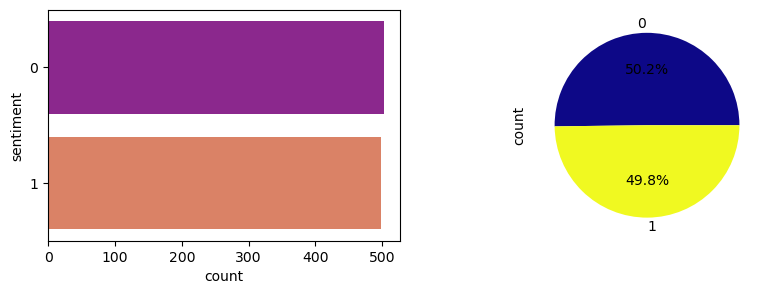

In [19]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
sns.countplot(y = df['sentiment'],palette = 'plasma')
plt.subplot(1,2,2)
df['sentiment'].value_counts().plot.pie(autopct = '%1.1f%%', cmap = 'plasma')

###  Create a function to Preprocess the review column

In [21]:
def preprocess(sentence):
    text = re.sub(r'[^a-zA-Z0-9]',' ', sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words]
    word = ' '.join(word)
    return word
             
    

### Apply the function in the review column

In [23]:
df['review'] = df['review'].apply(preprocess)

### Print reviews after preprocess

In [25]:
for i in range(5):
    print(df['review'][i])
    print()

get one film trailer 50 time better movie i first saw trailer 1991 look great since always want see could never find today yes 14 years later br br let say i disappoint unreal ok know oscar winner still hop would fun brain film bloodsport mold unfortunately pooh br br whats american rock roll music act bad quite frighten br br the fight scenes rubbish look fake br br dvd cost 5 i believe i overcharge 7 br br now i sad i know i never get hour half back

this may well worst movie i see i live 100 i think group first graders could come better plot line class project i dumber watch god mercy souls pay produce film br br and i finally turn i actually urge vomit br br no one clue photography make no one clue act no one clue anything br br i believe f x show crap occasion the time i see one starz channel even main one and 3

this well make documentary excite world indy car race the photography simply outstanding the scene mario andretti drive old race roadster new england street line ancient 

### Split the dataset into Input (X) & Target (y) variable

In [27]:
X = df['review']
y = df['sentiment']

### Create Keras tokenizer object with 5000 max words

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index)+1

def text_encoding(text):
    encoded_docs = tokenizer.texts_to_sequences(text)
    padded_sequence = pad_sequences(encoded_docs,maxlen = 128)
    return padded_sequence

X = text_encoding(X)
    

### Split the dataset into Training & Testing set

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [32]:
print('Shape of X_train :',X_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)

Shape of X_train : (700, 128)
Shape of X_test : (300, 128)
Shape of y_train : (700,)
Shape of y_test : (300,)


### Create keras Sequential Model with LSTM Layers

In [34]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation ='sigmoid'))

### Compile the model

In [36]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy',metrics =['accuracy'])

### Train the model with our training set

In [38]:
model.fit(X_train,y_train,epochs = 10, validation_split = 0.1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5143 - val_loss: 0.6882
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - accuracy: 0.7263 - loss: 0.6251 - val_accuracy: 0.7857 - val_loss: 0.5350
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.9741 - loss: 0.1448 - val_accuracy: 0.7286 - val_loss: 2.0415
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.9799 - loss: 0.1371 - val_accuracy: 0.6857 - val_loss: 0.9966
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.9988 - loss: 0.0102 - val_accuracy: 0.6857 - val_loss: 1.5326
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.7143 - val_loss: 1.8767
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.9959 - loss: 0.0190 - val_accuracy: 0.6857 - val_loss: 1.6017
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0

### Evaluate the model

In [40]:
model.evaluate(X_train,y_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9958 - loss: 0.0241 


[0.16746163368225098, 0.9685714244842529]

In [41]:
### Predict the model

In [42]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step


In [43]:
y_pred[:5]

array([[9.9687749e-01],
       [3.8053482e-04],
       [2.6922411e-01],
       [2.4888930e-03],
       [9.9983257e-01]], dtype=float32)

In [44]:
y_pred = (y_pred > 0.5).astype(int)

In [45]:
y_pred[:5]

array([[1],
       [0],
       [0],
       [0],
       [1]])

In [46]:
#### Accuracy of the model

In [47]:
accuracy_score(y_test,y_pred)

0.6733333333333333

In [48]:
#### Confusion matrix

<Axes: >

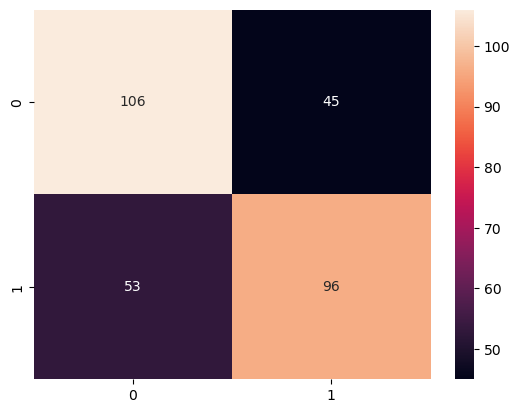

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       151
           1       0.68      0.64      0.66       149

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300

